# Explore here

In [134]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [135]:
df.to_csv('Demographic_health_data.csv', index=False)


In [136]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_num'] = pd.factorize(df[column])[0]
df.isnull().sum()       

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
COUNTY_NAME_num           0
STATE_NAME_num            0
Length: 110, dtype: int64

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 110 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47), object(2)
memory usage: 2.6+ MB


In [138]:
df.drop_duplicates(inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 110 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47), object(2)
memory usage: 2.6+ MB


In [140]:
df['diabetes_prevalence'].describe()

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

In [141]:
for column in df.columns:
    nulls = df[column].isnull().sum()
    if nulls > 0:
        print(column)

In [142]:

print(df.columns[46])
print(df.columns[77])
print(df.columns[93])

df = df[['Percent of adults with a high school diploma only 2014-18','Percent of Population Aged 60+','Heart disease_Upper 95% CI','diabetes_prevalence']]
df.info()
df.head()

#eda

Percent of adults with a high school diploma only 2014-18
Percent of Population Aged 60+
Heart disease_Upper 95% CI
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Percent of adults with a high school diploma only 2014-18  3140 non-null   float64
 1   Percent of Population Aged 60+                             3140 non-null   float64
 2   Heart disease_Upper 95% CI                                 3140 non-null   float64
 3   diabetes_prevalence                                        3140 non-null   float64
dtypes: float64(4)
memory usage: 98.3 KB


,Percent of adults with a high school diploma only 2014-18,Percent of Population Aged 60+,Heart disease_Upper 95% CI,diabetes_prevalence
0,32.6,19.1,8.7,12.9
1,27.6,26.3,8.7,12.0
2,35.7,23.5,11.8,19.7
3,47.3,21.1,9.3,14.1
4,34.0,23.6,10.1,13.5


/tmp/ipykernel_7411/2361270983.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


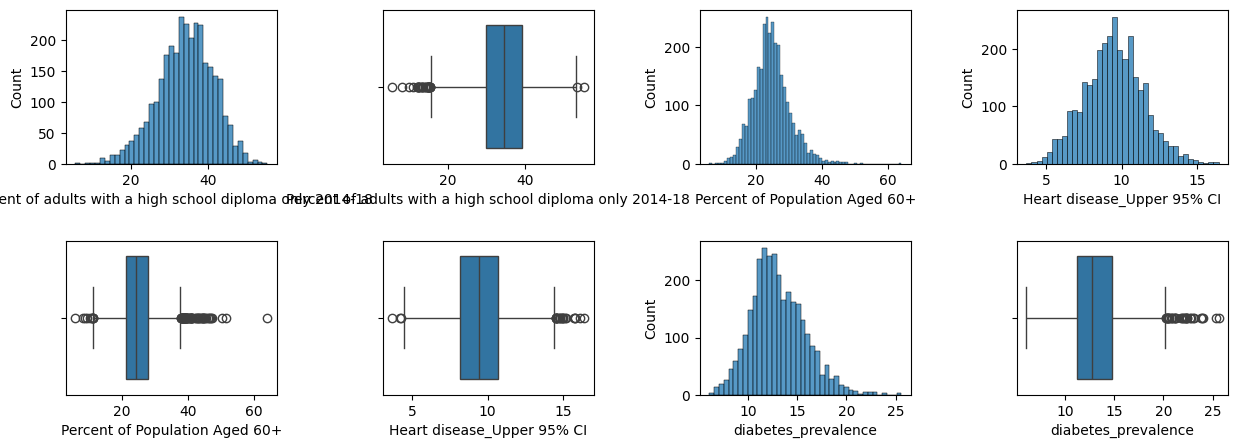

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 4, figsize=(15, 5), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})

sns.histplot(df['Percent of adults with a high school diploma only 2014-18'], ax=axis[0, 0])
sns.boxplot(x='Percent of adults with a high school diploma only 2014-18', data=df, ax=axis[0, 1])
sns.histplot(df['Percent of Population Aged 60+'], ax=axis[0, 2])
sns.boxplot(x='Percent of Population Aged 60+', data=df, ax=axis[1, 0])
sns.histplot(df['Heart disease_Upper 95% CI'], ax=axis[0, 3])
sns.boxplot(x='Heart disease_Upper 95% CI', data=df, ax=axis[1, 1])
sns.histplot(df['diabetes_prevalence'], ax=axis[1, 2])
sns.boxplot(x='diabetes_prevalence', data=df, ax=axis[1, 3])

plt.tight_layout()
plt.show()

#Analisis univariante

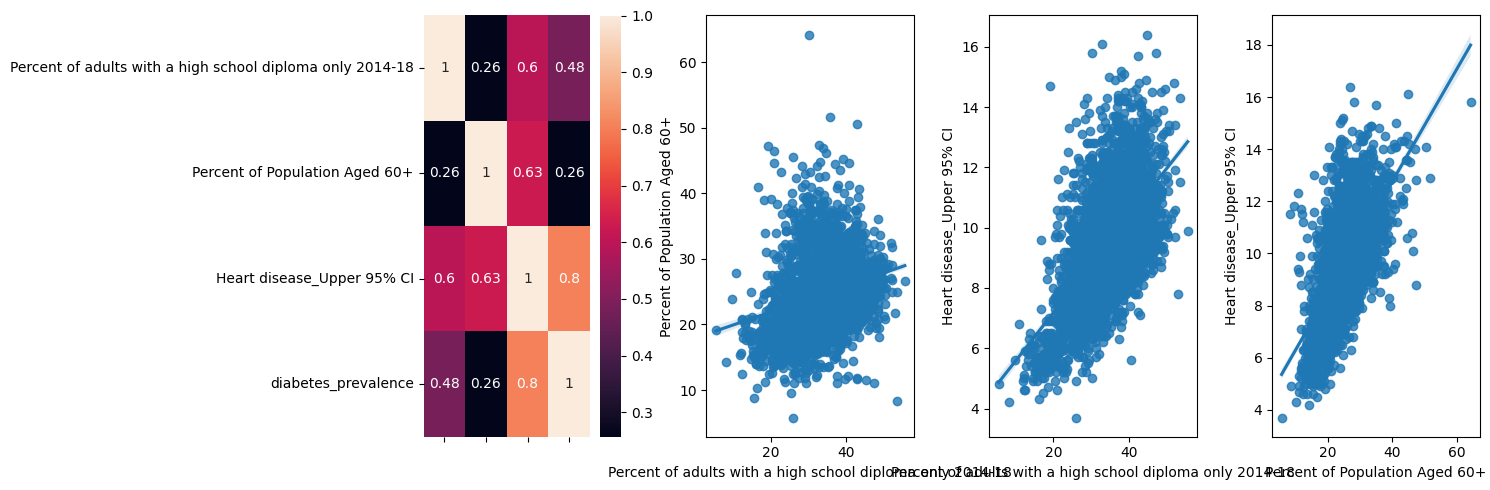

In [144]:
A = 'Percent of adults with a high school diploma only 2014-18'
B = 'Percent of Population Aged 60+'
C = 'Heart disease_Upper 95% CI'
Y = 'diabetes_prevalence'
fig, axis = plt.subplots(1,4,figsize=(15,5))

sns.heatmap(df[['Percent of adults with a high school diploma only 2014-18', 'Percent of Population Aged 60+', 'Heart disease_Upper 95% CI', 'diabetes_prevalence']].corr(), annot=True, ax=axis[0]).set(xticklabels=[])
sns.regplot(x=A, y=B, data=df, ax=axis[1])
sns.regplot(x=A, y=C, data=df, ax=axis[2])
sns.regplot(x=B, y=C, data=df, ax=axis[3])

plt.tight_layout()
plt.show()

#Analisis multivariante

# Conclusion: Las tres variables están relacionadas positivamente con Y. La edad avanzada (mayor de 60) se asocia a enfermedades cardíacas. La relación entre el porcentaje de diplomados (2014-2018) y enfermedades cardíacas probablemente no es real. No necesitamos analizar categorías ni transformar variables.

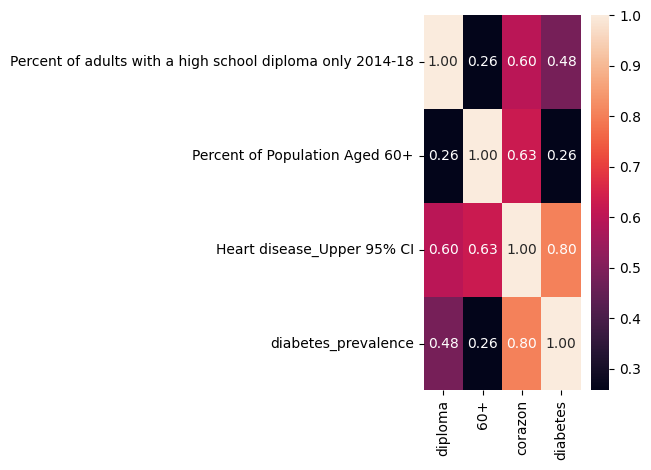

In [145]:
variables_numericas = []
for column in df.columns:
    if df[column].dtype != 'object':
        variables_numericas.append(column)
variables_numericas

sns.heatmap(df[variables_numericas].corr(), annot=True, fmt='.2f').set(xticklabels=['diploma','60+','corazon','diabetes'])

plt.tight_layout()
plt.show()

#Heatmap

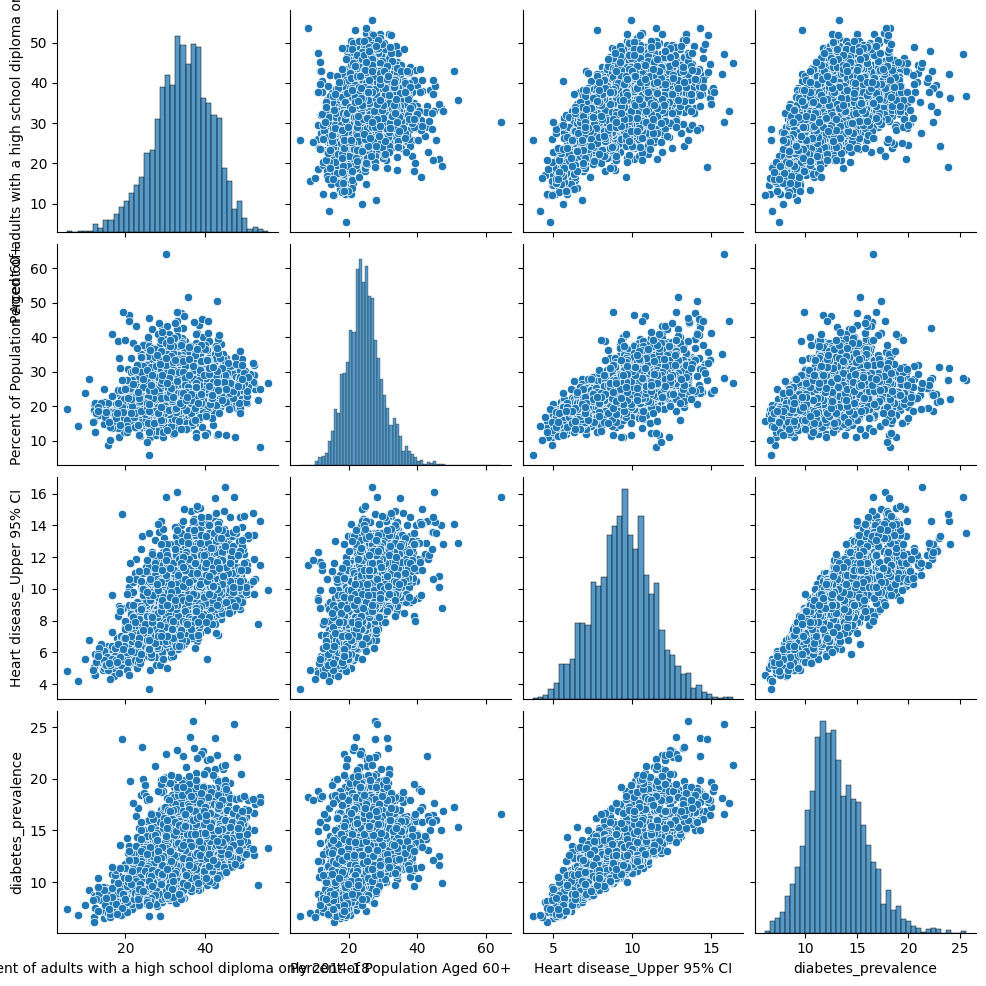

In [146]:
sns.pairplot(data=df)
plt.show()

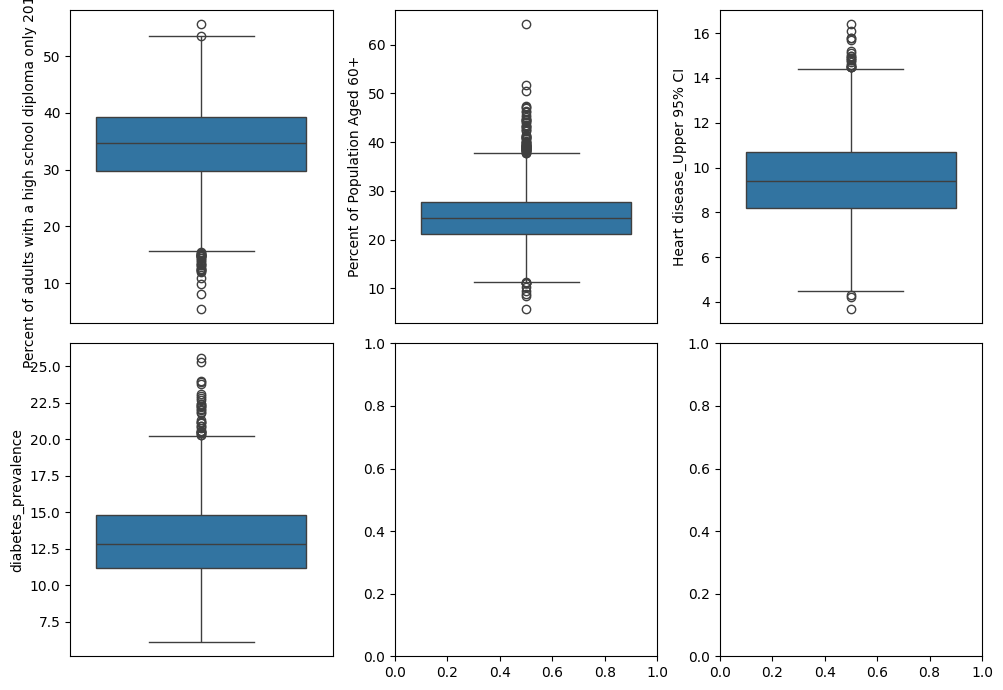

In [151]:
from Feroz import analisis_boxplot

analisis_boxplot(df,'diabetes_prevalence')

#Outliers

In [153]:
from Feroz import analisis_ric
analisis_ric(df)

columna: Percent of adults with a high school diploma only 2014-18 limites superior 53.54999999999999 e inferior 15.550000000000006
columna: Percent of Population Aged 60+ limites superior 37.7 e inferior 11.299999999999997
columna: Heart disease_Upper 95% CI limites superior 14.45 e inferior 4.449999999999999
columna: diabetes_prevalence limites superior 20.200000000000003 e inferior 5.799999999999997


In [154]:
df = df[(df['Percent of adults with a high school diploma only 2014-18'] >= 15.550000000000006) & (df['Percent of adults with a high school diploma only 2014-18'] <= 53.54999999999999)]
df = df[(df['Percent of Population Aged 60+'] >= 11.299999999999997) & (df['Percent of Population Aged 60+'] <= 37.7)]
df = df[(df['Heart disease_Upper 95% CI'] >= 4.449999999999999) & (df['Heart disease_Upper 95% CI'] <= 14.45)]
df = df[(df['Percent of Population Aged 60+'] >= 5.799999999999997) & (df['Percent of Population Aged 60+'] <= 20.200000000000003)]

#Retirar outliers

In [155]:
df.shape

(583, 4)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['diabetes_prevalence'], axis=1)
Y = df['diabetes_prevalence']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state= 42)

X_train.head()

#Clase

,Percent of adults with a high school diploma only 2014-18,Percent of Population Aged 60+,Heart disease_Upper 95% CI
275,27.1,19.2,7.1
3135,33.3,15.8,6.4
1047,30.3,19.7,9.4
923,35.1,17.4,8.4
2591,23.9,15.9,7.2


In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train,Y_train)
xtrain_escalados = scaler.transform(X_train)
xtest_escalados = scaler.transform(X_test)

X_train_esc = pd.DataFrame(xtrain_escalados, index=X_train.index,columns=X_train.columns)
X_test_esc = pd.DataFrame(xtest_escalados, index=X_test.index,columns=X_test.columns)

In [162]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model_rl = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

model_rl.fit(X_train_esc,Y_train)
model_lasso.fit(X_train_esc,Y_train)
model_ridge.fit(X_train_esc,Y_train)

Ridge()

In [163]:
Y_pred_rl = model_rl.predict(X_test_esc)
Y_pred_lasso = model_lasso.predict(X_test_esc)
Y_pred_ridge = model_ridge.predict(X_test_esc)

In [166]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'El error de la regresion lineal es {mean_squared_error(Y_test,Y_pred_rl)} y el R2 es de {r2_score(Y_test,Y_pred_rl)}')
print(f'El error de la regresion lasso es {mean_squared_error(Y_test,Y_pred_lasso)} y el R2 es de {r2_score(Y_test,Y_pred_rl)}')
print(f'El error de la regresion ridge es {mean_squared_error(Y_test,Y_pred_ridge)} y el R2 es de {r2_score(Y_test,Y_pred_rl)}')

El error de la regresion lineal es 1.7702703320187787 y el R2 es de 0.763139271815307
El error de la regresion lasso es 3.0615895131606603 y el R2 es de 0.763139271815307
El error de la regresion ridge es 1.7716871109329702 y el R2 es de 0.763139271815307


In [167]:
Y_pred_rl_train = model_rl.predict(X_train_esc)
print(f'El error de la regresion ridge es {mean_squared_error(Y_train,Y_pred_rl_train)} y el R2 es de {r2_score(Y_train,Y_pred_rl_train)}')

El error de la regresion ridge es 1.9288840227175437 y el R2 es de 0.7538562892271229


In [168]:
import numpy as np
var_x = np.linspace(0,20,100)
var_x

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [170]:
r2_alphas = []
for alpha in var_x:
   model = Lasso(alpha=alpha)
   model.fit(X_train_esc, Y_train)
   Y_pred = model.predict(X_test_esc)
   r2_alphas.append(r2_score(Y_test, Y_pred))
r2_alphas   

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.494e+02, tolerance: 3.652e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

[0.7631392718153072,
 0.7361728713612203,
 0.7092894828132086,
 0.6789266275897786,
 0.6383569953171706,
 0.5875805859953844,
 0.5265973996244202,
 0.4554074362042779,
 0.3740106957349574,
 0.2824071782164589,
 0.18059688364878212,
 0.06857981203192753,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.03639441182034919,
 -0.036394

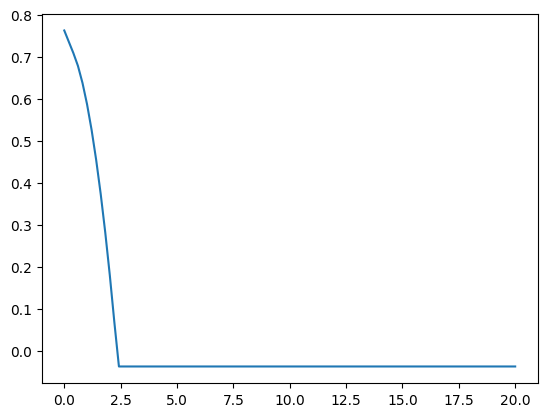

In [171]:
import matplotlib.pyplot as plt

plt.plot(var_x,r2_alphas)
plt.show()